In [236]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [237]:
from daemon_analysis_tools.file_handling import load_and_process_csv
from daemon_analysis_tools.data.utils import group_questions_by_journal
from daemon_analysis_tools.data.publisher import Publisher
from daemon_analysis_tools.file_handling import save_answers_to_yaml, load_answers_from_yaml

Load and process data:
- Group answers by publisher and journal, trying to uniform names written in slightly different ways.
- Store in a DataFrame

In [238]:
data = load_and_process_csv('../../data/raw/rdp.csv')

Get a `dict` labeled by publisher names of `dict`s labeled by journal names of `dict`s of `Question` instances. The `.answer` attribute contains the answers given by the respondents and the explanations text to motivate it.

In [239]:
grouped_questions = group_questions_by_journal(data)

ACS accounts_of_chemical_research 1
ACS accounts_of_materials_research 3
ACS acs_applied_materials_and_interfaces 1
ACS applied_materials_and_interfaces 1
ACS chemrxiv 1
ACS the_journal_of_organic_chemistry 1
AIP aip_advances 1
AIP apl_materials 1
AIP apl_photonics 1
AIP applied_physics_letters 1
AIP applied_physics_reviews 1
AIP chinese_journal_of_chemical_physics 1
AIP journal_of_applied_physics 1
AIP journal_of_mathematical_physics 1
AIP low_temperature_physics 1
AIP physics_of_fluids 1
AIP physics_of_plasmas 1
AIP review_of_scientific_instruments 1
AIP structural_dynamics 1
AIP the_journal_of_chemical_physics 1
EDP Sciences astronomy_and_astrophysics 1
EDP Sciences e3s_web_of_conferences 1
EDP Sciences epj_web_of_conferences 1
EDP Sciences journal_of_the_european_optical_society-rapid_publications 1
EDP Sciences matec_web_of_conferences 1
EDP Sciences metallurgical_research_and_technology 1
Elsevier applied_catalysis_b_environment_and_energy 1
Elsevier chemical_engineering_journal 

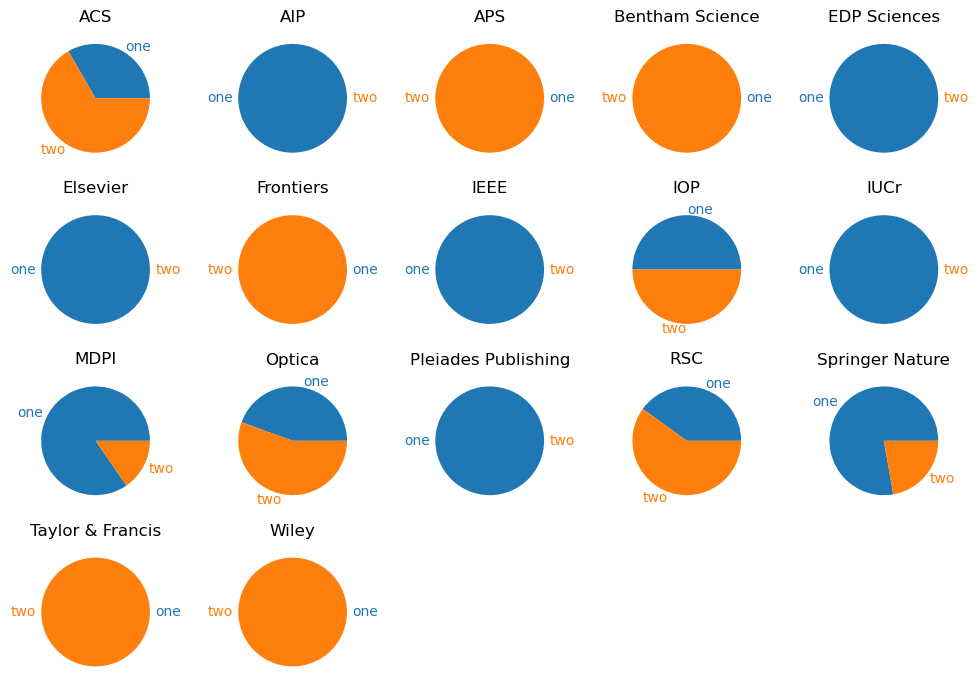

In [240]:
import numpy as np
from matplotlib import pyplot as plt

duplicates = {}

for publisher, journals in grouped_questions.items():
    for journal, data in journals.items():
        for question, answer in data.items():
            #if answer.has_discrepancies():
            duplicates[(publisher, journal)] = len(answer.answers)

n_double = {}

for (publisher, journals), num in duplicates.items():

    if not publisher in n_double:
        n_double[publisher] = [0, 0, 0]

    if num == 1:
        print(publisher, journals, num)
        n_double[publisher][0] += 1
    elif num == 2:
        n_double[publisher][1] += 1
    else:
        print(publisher, journals, num)
        n_double[publisher][2] += 1

# Creating dataset
cars = ['one', 'two']
colors = ['C0', 'C1']

# Creating plot
fig = plt.figure(figsize=(10, 7))

for ind, (publisher, data) in enumerate(n_double.items()):

    w = 5
    h = int(np.ceil(len(n_double)/w))

    plt.subplot(h, w, ind+1)
    plt.title(publisher)
    _, texts = plt.pie(data[0:2], labels=cars, colors=colors)

    for text, color in zip(texts, colors):
        text.set_color(color)

plt.tight_layout()
fig.savefig("../../data/processed/encoding_coverage.pdf")
        

In [241]:
n_journals = {}

for publisher, journals in grouped_questions.items():
    n_journals[publisher] = len(journals)

for publisher, num in n_journals.items():
    print(publisher, num)

ACS 16
AIP 14
APS 11
Bentham Science 6
EDP Sciences 6
Elsevier 9
Frontiers 7
IEEE 5
IOP 18
IUCr 10
MDPI 15
Optica 9
Pleiades Publishing 9
RSC 15
Springer Nature 9
Taylor & Francis 15
Wiley 15
